# 기계학습 및 실습 2024년 2학기 중간과제

## 타이타닉 데이터셋 분석 

-인공지능융합학부 안정빈(2020100381)

## 타이타닉 데이터 분석 목차

- [1. 데이터 불러오기](#1-데이터-불러오기)
    - [1-1. 데이터의 변수 정보 파악](#1-1-데이터의-변수-정보-파악)
- [2. 탐색적 분석(EDA)](#2-탐색적-분석eda)
    - [2-1. 단일 변수 파악](#2-1-단일-변수-파악)
    - [2-2. 다중 변수 파악](#2-2-다중-변수-파악)
- [3. 머신러닝](#3-머신러닝)
    - [3-1. 결측치 채우기](#3-1-결측치-채우기)
    - [3-2. 모델 학습](#3-2-모델-학습)
    - [3-3. 정확도 출력](#3-3-정확도-출력)

## 0. 목적 정의

위 프로젝트는 타이타닉 탑승객의 생존 여부를 예측하는 모델을 생성하는 프로젝트이다.

또한, 타이타닉 데이터를 분석하여, 탑승객들에 대한 통찰력을 얻는 프로젝트이다.


### 1. 데이터 불러오기 <a id="데이터-불러오기"></a>

#### 1-1. 데이터 변수 정보 파악

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.rcParams['font.family'] = 'Malgun Gothic'

df=pd.read_csv("./data/train.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.shape

(891, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


본격적인 EDA를 진행하기 전, 데이터셋을 확인하였다.

승객의 생존 여부, 티켓의 등급, 승객의 이름, 성별, 나이, 같이 탑승한 형제/자매/배우자의 수, 같이 탑승한 부모/자식의 수, 티켓 번호, 요금, 객실 번호, 승선항과 같은 11개의 변수가 존재하고 있으며 총 891개의 데이터가 존재하고 있다.

수치형 변수:생존 여부, 티켓 등급, 나이, 탑승한 형제/자매/배우자의 수, 같이 탑승한 부모/자식의 수, 요금 

문자형 변수: 이름, 성별, 티켓 번호, 객실 번호, 승선항

나이는 177개, 객실 번호는 687개, 승선항은 2개의 결측치를 가지고 있으며, 나머지 변수들은 결측치가 없다.

## 2. 탐색적 분석(EDA)

### 2-1. 단일 변수 파악

먼저, 단일 변수의 특성을 파악해보려 한다. 또한 단일 변수와 생존 여부의 관계 역시 파악해보려 한다.

#### 2-1-1. Survived

전체 인원 수: 891
생존 인원 수: 342
사망 인원 수: 549


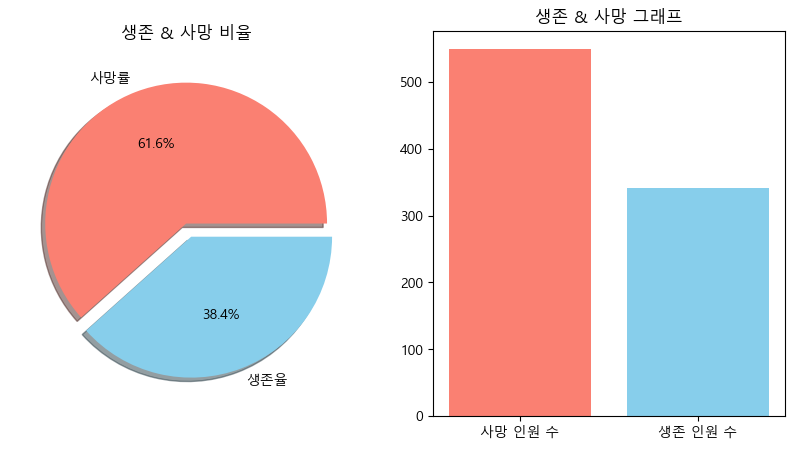

In [8]:
survive=df[df['Survived'] == 1]['Survived'].count()
death=df[df['Survived'] == 0]['Survived'].count()
values=[death,survive]
categories=['사망 인원 수','생존 인원 수']
print("전체 인원 수:", df['Survived'].count())
print("생존 인원 수:", survive)
print("사망 인원 수:", death)

f,ax=plt.subplots(1,2,figsize=(10,5))
df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',labels=['사망률', '생존율'],ax=ax[0],shadow=True,colors=['salmon', 'skyblue'])
ax[0].set_title('생존 & 사망 비율')
ax[0].set_ylabel('')

ax[1].bar(categories, values ,color=['salmon', 'skyblue'])
ax[1].set_title('생존 & 사망 그래프')

plt.show()

전체 탑승객 891명 중, 생존 인원은 342, 사망 인원은 549명이다. 

전체 탑승객 중 61.6%가 사망했고, 38.4%만이 생존하였다. 

이 생존 확률을 기준으로, 다양한 상황 중, 언제 생존률이 높고, 낮은지 판단해보려 한다.

#### 2-1-2. Pclass

In [9]:
print("등급 별 탑승객 수:")
df['Pclass'].value_counts()

등급 별 탑승객 수:


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [10]:
print("등급 별 생존/사망 인원 수:")
df.groupby(['Pclass','Survived'])['Survived'].count()

등급 별 생존/사망 인원 수:


Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

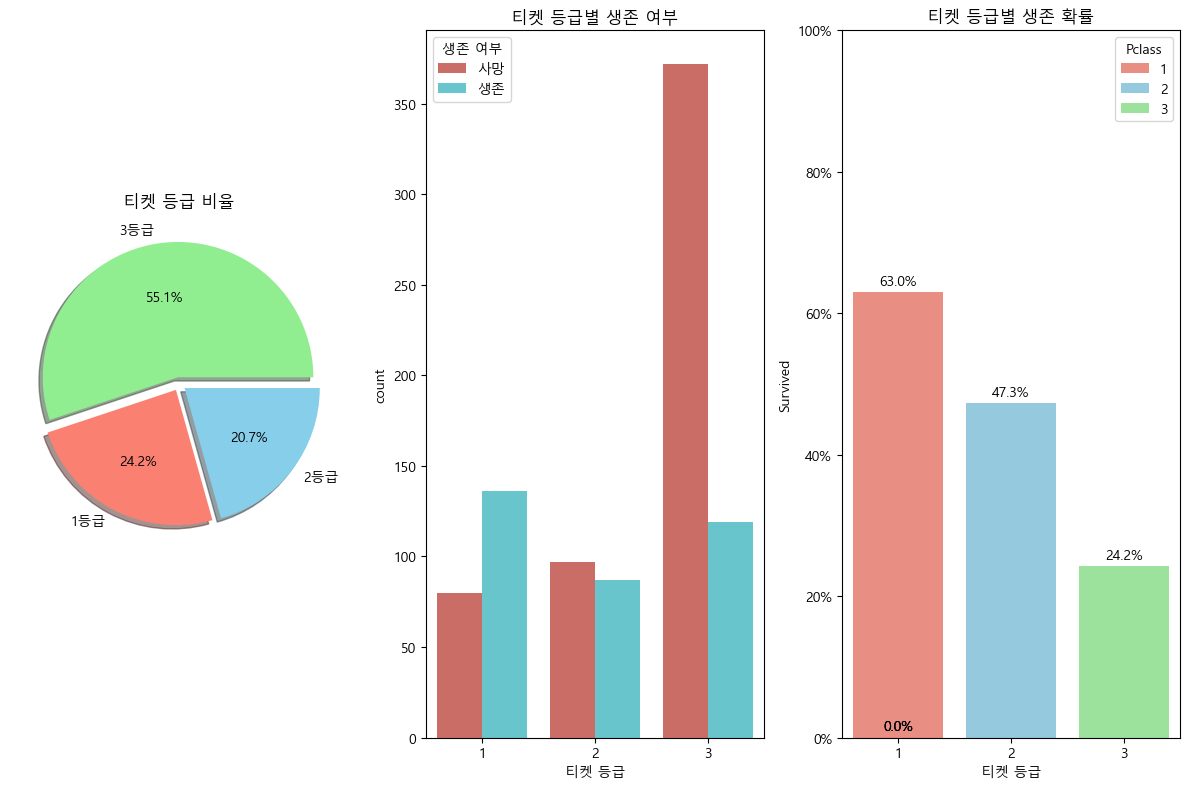

In [11]:
f,ax=plt.subplots(1,3,figsize=(12,8))
df['Pclass'].value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',labels=['3등급', '1등급','2등급'],
                                     ax=ax[0],shadow=True,colors=['lightgreen','salmon','skyblue'])
ax[0].set_title('티켓 등급 비율')
ax[0].set_ylabel('')

sns.countplot(data=df, x="Pclass", palette='hls', hue='Survived',ax=ax[1])
ax[1].set_title('티켓 등급별 생존 여부')
ax[1].set_xlabel('티켓 등급')
new_labels = ['사망', '생존']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, new_labels, title='생존 여부')

survival_rates = df.groupby('Pclass')['Survived'].mean().reset_index()

sns.barplot(data=survival_rates, x='Pclass', y='Survived', hue='Pclass', palette=['salmon','skyblue','lightgreen'], ax=ax[2])
ax[2].set_title('티켓 등급별 생존 확률')
ax[2].set_xlabel('티켓 등급')
ax[2].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax[2].set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

for p in ax[2].patches:
    ax[2].annotate(f'{p.get_height() * 100:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')
plt.tight_layout() 
plt.show()


전체 탑승객 중, 491명, 55.1%가 3등급칸을 이용하였고, 216명,24.2%가 1등급칸을 이용하였으며, 2등급칸은 184명, 20.7%가 이용하였다.

1등급 탑승객의 경우, 생존 확률이 63%로 가장 높은 생존률을 보이고 있다. 2등 탑승객의 경우 생존확률이 47.3%로 50%에는 못 미치지만, 그럼에도 1,2등급 승객은 전체 생존률인 38.4%보다 높은 생존률을 보이고 있다.

반대로, 3등급 탑승객의 경우, 생존확률이 24.2%로 가장 낮은 생존률을 보이며, 전체 생존률보다 14% 정도 낮다.

또한, 두번째 그래프를 보면, 대부분의 사망자가 3등급칸에서 나온 것을 알 수 있다.

이를 통해, 1등급 탑승객이 구명정등을 이용해 제일 먼저 구조되었고, 그 후 2등급, 3등급 순으로 구조되었음을 추측해볼 수 있다.

#### 2-1-3.Sex

In [12]:
print("남녀 탑승객 수:")
df['Sex'].value_counts()

남녀 탑승객 수:


Sex
male      577
female    314
Name: count, dtype: int64

In [13]:
print("남녀 생존 사망 인원 수:")
df.groupby(['Sex','Survived'])['Survived'].count()

남녀 생존 사망 인원 수:


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

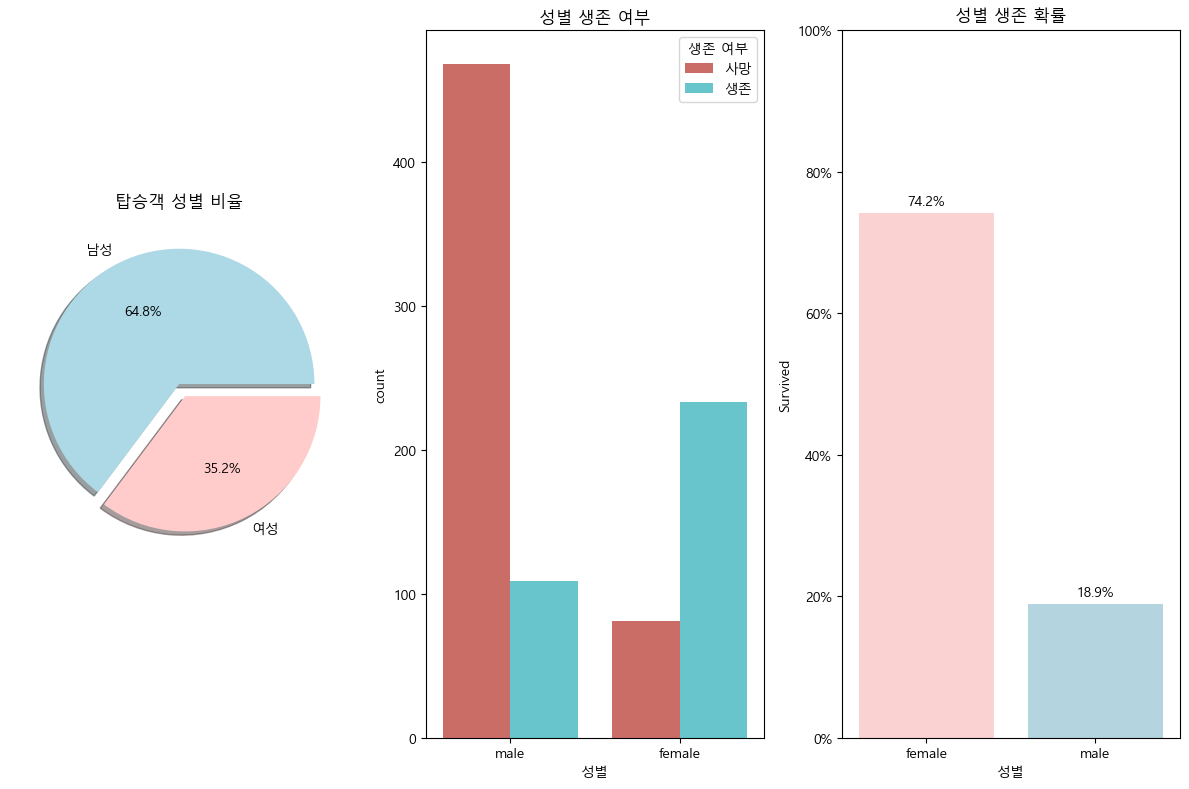

In [14]:
f, ax = plt.subplots(1, 3, figsize=(12, 8))

df['Sex'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', labels=['남성', '여성'], ax=ax[0], shadow=True,colors=["#ADD8E6", "#FFCCCB"])
ax[0].set_title('탑승객 성별 비율')
ax[0].set_ylabel('')

sns.countplot(data=df, x="Sex", palette='hls', hue='Survived', ax=ax[1])
ax[1].set_title('성별 생존 여부')
ax[1].set_xlabel('성별')
new_labels = ['사망', '생존']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, new_labels, title='생존 여부')

survival_rates_by_gender = df.groupby('Sex')['Survived'].mean().reset_index()
sns.barplot(data=survival_rates_by_gender, x='Sex', y='Survived', hue='Sex', palette=["#FFCCCB","#ADD8E6"], ax=ax[2])
ax[2].set_title('성별 생존 확률')
ax[2].set_xlabel('성별')
ax[2].set_ylim(0, 1)
ax[2].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax[2].set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

for p in ax[2].patches:
    ax[2].annotate(f'{p.get_height() * 100:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.tight_layout()
plt.show()


남성 탑승객의 비율은 64.8% 여성 탑승객의 비율은 35.2%로 남성 탑승객의 비율이 더 높은 것을 알 수 있다.

그러나 남성의 생존률은 18.9%로 매우 낮은 반면, 여성의 생존률은 74.2%로 매우 높은 것을 확인할 수 있다.

두번째 그래프를 보면, 전체 사망자의 80%이상이 남자이며, 생존자의 30%정도만 남자인 것 역시 확인할 수 있다.

이를 통해 여성이 구조 우선순위였음을 유추해볼 수 있다.

#### 2-1-4. SibSp

탑승한 동반자 수(형제, 자매, 배우자)


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

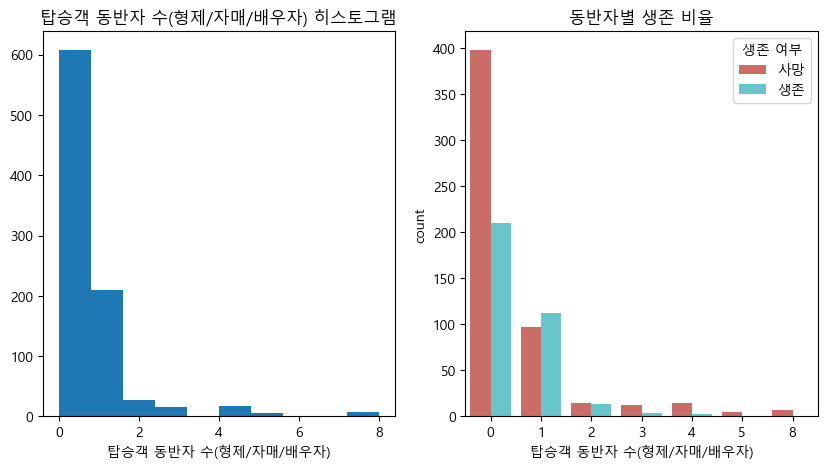

In [15]:
f,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].hist(df['SibSp'])
ax[0].set_title('탑승객 동반자 수(형제/자매/배우자) 히스토그램')
ax[0].set_xlabel('탑승객 동반자 수(형제/자매/배우자)')

sns.countplot(data=df, x="SibSp", palette='hls', hue='Survived',ax=ax[1])
ax[1].set_title('동반자별 생존 비율')
ax[1].set_xlabel('탑승객 동반자 수(형제/자매/배우자)')
new_labels = ['사망', '생존']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, new_labels, title='생존 여부')

print("탑승한 동반자 수(형제, 자매, 배우자)")
df['SibSp'].value_counts()

891명의 승객중 608명의 승객이 형제,자매, 배우자 등과 탑승하지 않은 것으로 드러났다.
그 외 209명의 승객이 1명의 동반자와 탑승하였다. 즉 대부분의 승객들이 1명 이하의 형제, 자매, 배우자와 탑승한 것을 알 수 있다.

동반자 수와 생존률을 같이 확인해보면, 1,2명의 동반자가 있을 때 제일 높은 생존율을 보이는 것을 알 수 있다. 

표본이 작지만, 4,5,8명의 동반자 즉 많은 동반자와 탑승한 승객의 생존률이 매우 낮은 것을 알 수 있다. 

형제/자매/배우자와 같은 동반자와 탑승한 승객이 더 좋은 객실(1,2)등급을 사용하였거나, 구조 우선 순위였을 가능성이 존재한다.

#### 2-1-5. Parch

탑승한 동반자 수(부모/자녀)


Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

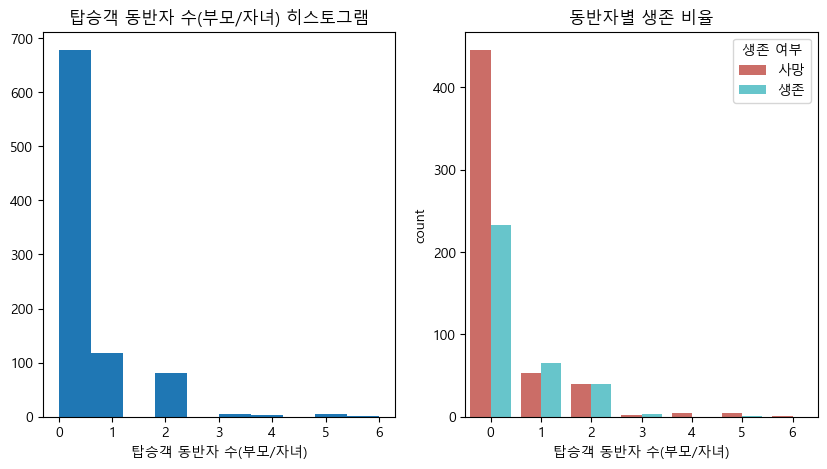

In [16]:
f,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].hist(df['Parch'])
ax[0].set_title('탑승객 동반자 수(부모/자녀) 히스토그램')
ax[0].set_xlabel('탑승객 동반자 수(부모/자녀)')

sns.countplot(data=df, x="Parch", palette='hls', hue='Survived',ax=ax[1])
ax[1].set_title('동반자별 생존 비율')
ax[1].set_xlabel('탑승객 동반자 수(부모/자녀)')
new_labels = ['사망', '생존']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, new_labels, title='생존 여부')

print("탑승한 동반자 수(부모/자녀)")
df['Parch'].value_counts()

부모/자녀 없이 혼자 탑승한 고객이 678명으로 제일 많으며, 1명의 부모/자녀와 탑승한 고객이 118명, 2명의 부모/자녀와 탑승한 고객이 80명으로 대부분을 차지하고 있다.

위와 마찬가지로, 1명,2명의 부모/자녀와 탑승한 고객의 생존률이 50%이상임을 알 수 있다.

더 확인해봐야겠지만, 1,2명의 부모/자녀와 탑승한 고객들이 높은 등급의 객실에 머물렀을 가능성이 높거나, 구조 우선순위였음이 예상된다.

#### 2-1-6. Age

In [17]:
bins = range(0, 86, 5) 
labels = [f'{i}-{i+4}' for i in bins[:-1]] 

df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df['Age_group'].value_counts()

Age_group
20-24    114
25-29    106
30-34     95
15-19     86
35-39     72
40-44     48
45-49     41
0-4       40
50-54     32
5-9       22
10-14     16
55-59     16
60-64     15
70-74      6
65-69      4
80-84      1
75-79      0
Name: count, dtype: int64

C:\Users\jeongbin\AppData\Local\Temp\ipykernel_40876\2997548859.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Age_group", palette='hls', ax=ax[0], legend=False)


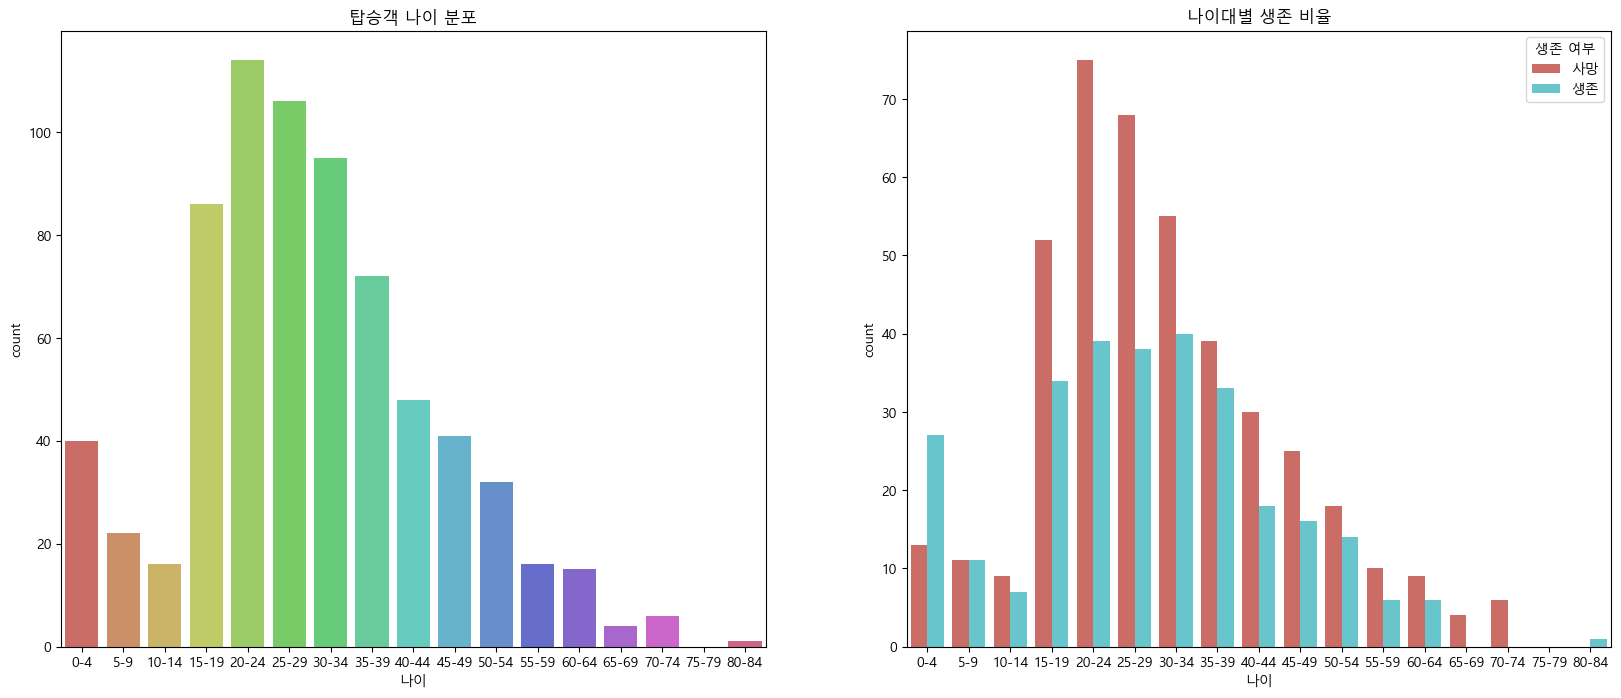

In [18]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(data=df, x="Age_group", palette='hls', ax=ax[0], legend=False)
ax[0].set_title('탑승객 나이 분포')
ax[0].set_xlabel('나이')

sns.countplot(data=df, x="Age_group",palette='hls', hue='Survived', ax=ax[1])
ax[1].set_title('나이대별 생존 비율')
ax[1].set_xlabel('나이')
new_labels = ['사망', '생존']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, new_labels, title='생존 여부')
plt.show()

탑승객의 나이의 분포와, 생존 비율을 확인해보기 위해서, 5살 단위로, 승객들을 분리하였다.

전반적인 분포를 확인해보면, 15~34세 나이의 승객이 제일 많이 탑승하였고, 55세 이후의 승객들은 최대 20명으로 적은 비율을 보이고 있다. 또한 40명의 영유아들이 타이타닉호를 탑승했음을 알 수 있다. 

나이대별 생존 비율 그래프를 보면 14세 미만의 아이들의 생존률이 제일 높게 나타나고 있다. 특히 0~4세 유아들의 생존률은 66%이상으로 보인다. 어린 아이들을 우선적으로 구조했음을 예상해볼 수 있다. 

반대로, 20~29세 사이의 승객들이 제일 많이 사망하였으며, 생존률 역시 제일 낮게 나타나 보인다. 신체적으로 제일 건강한 나이이기에, 구조 후순위였거나, 다른 승객들에 비해 3등급칸 이용 비율이 높았을 수 있다.




#### 2-1-7. Embarked

In [19]:
print("승선항별 탑승 인원 수:")
df['Embarked'].value_counts()

승선항별 탑승 인원 수:


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [20]:
print("승선항별 생존 사망 인원 수:")
df.groupby(['Embarked','Survived'])['Survived'].count()

승선항별 생존 사망 인원 수:


Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

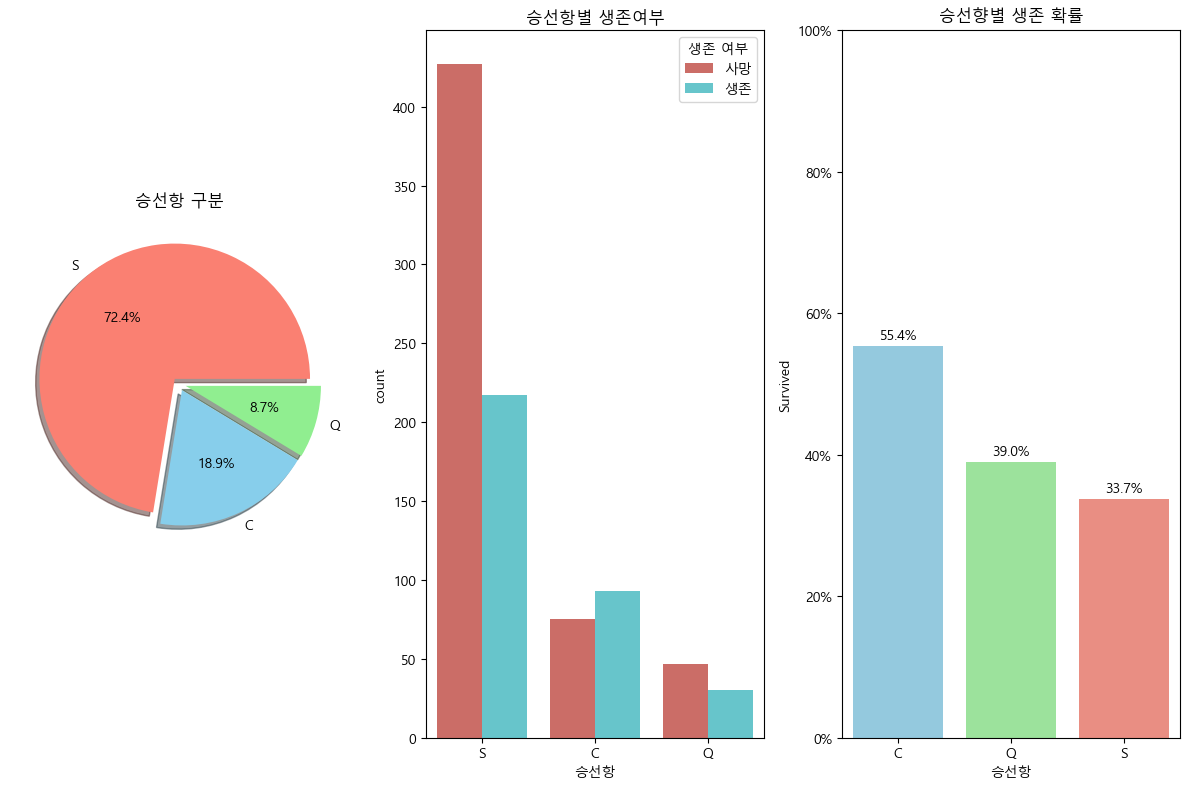

In [21]:
f,ax=plt.subplots(1,3,figsize=(12,8))
df['Embarked'].value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',
                                       colors=['salmon','skyblue','lightgreen'], ax=ax[0],shadow=True)
ax[0].set_title("승선항 구분")
ax[0].set_ylabel('')

sns.countplot(data=df, x="Embarked",palette='hls', hue='Survived', ax=ax[1])
ax[1].set_title('승선항별 생존여부')
ax[1].set_xlabel('승선항')
new_labels = ['사망', '생존']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, new_labels, title='생존 여부')

survival_rates_embarked = df.groupby('Embarked')['Survived'].mean().reset_index()
sns.barplot(data=survival_rates_embarked, x='Embarked', y='Survived', hue='Embarked', palette=['skyblue','lightgreen','salmon'], ax=ax[2])
ax[2].set_title('승선향별 생존 확률')
ax[2].set_xlabel('승선항')
ax[2].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax[2].set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

for p in ax[2].patches:
    ax[2].annotate(f'{p.get_height() * 100:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')
plt.tight_layout() 
plt.show()



'S' 항구에서 승선한 승객은 전체 탑승객의 72.4%로, 대부분의 승객이 'S'항구에서 승선하였다. 그러나 생존률은 33.7%로, 제일 낮은 생존률을 보이고 있다.

'C' 항구에서 탑승한 승객들은 55.4%의 생존률을 보이고 있으며, 'Q' 항구에서 탑승한 승객들은 39%의 생존률로, 전체 생존률(38.4%)와 비슷한 생존률을 보이고 있다.

이를 통해 'C' 항구에서 탑승한 승객들은 높은 등급의 객실을 이용했거나, 여성의 비율이 많았음을 유추해볼 수 있다.

#### 2-1-8. Fare

In [22]:
print('최고 요금:',df['Fare'].max())
print('최저 요금:',df['Fare'].min())
print('전체 평균 요금:',df['Fare'].mean())
print('1 등급 평균 요금:', df[df['Pclass'] == 1]['Fare'].mean())
print('2 등급 평균 요금:', df[df['Pclass'] == 2]['Fare'].mean())
print('3 등급 평균 요금:', df[df['Pclass'] == 3]['Fare'].mean())
print('요금 표준편차:',df['Fare'].std())

최고 요금: 512.3292
최저 요금: 0.0
전체 평균 요금: 32.204207968574636
1 등급 평균 요금: 84.1546875
2 등급 평균 요금: 20.662183152173913
3 등급 평균 요금: 13.675550101832993
요금 표준편차: 49.6934285971809


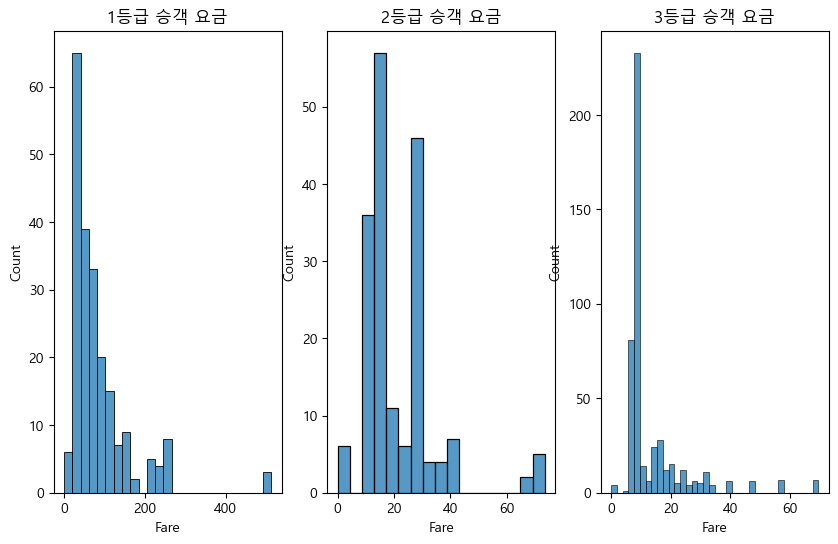

In [23]:
f,ax=plt.subplots(1,3,figsize=(10,6))
sns.histplot(df[df['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('1등급 승객 요금')
sns.histplot(df[df['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('2등급 승객 요금')
sns.histplot(df[df['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('3등급 승객 요금')
plt.show()

Fare, 요금은 티켓 등급과 관련이 깊은 변수라 판단하여, 전체 평균 요금과 티켓 등급별 요금을 확인하였다.

확인 결과 3등급 티켓보다 2등급 티켓의 평균 가격이 1.5배 정도 비싼 것을 알 수 있다. 그러나 1등급 티켓은 2등급 티켓보다 4배 정도의 평균 가격을 보이고 있다.

이를 통해 1등급 티켓의 가격이 2,3등급 티켓보다 월등히 비쌌다는 것을 알 수 있다.

2,3 등급의 그래프를 보면 대부분이 40달러 안에 위치하는 것을 볼 수 있다. 그러나 1등급의 그래프를 보면 100달러 이상의 값들도 꽤 존재하는 것을 알 수 있다.


#### 2-1-9 Ticket

In [24]:
ticket_counts = df['Ticket'].value_counts()
ticket_counts_filtered = ticket_counts[ticket_counts >= 2].reset_index()

ticket_counts_filtered.columns = ['Ticket', 'Count']

print(ticket_counts_filtered)

              Ticket  Count
0             347082      7
1               1601      7
2           CA. 2343      7
3            3101295      6
4            CA 2144      6
..               ...    ...
129           392096      2
130      S.O./P.P. 3      2
131       W./C. 6607      2
132  S.C./PARIS 2079      2
133        A/4 48871      2

[134 rows x 2 columns]


In [25]:
df[df['Ticket'] == '347082']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
PassengerId,,,,,,,,,,,,
14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S,35-39
120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S,0-4
542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S,5-9
543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S,10-14
611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S,35-39
814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S,5-9
851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S,0-4


31.275라는 같은 티켓을 확인해보니, 이름이 같고, SibSp와 Farch가 같은 값이기에 가족임을 확인할 수 있었다.

Andersson, Mr. Anders Johan와 Andersson, Mrs. Anders Johan (Alfrida Konstant...)은 부부사이이며, 5명의 자녀가 있었음을 알 수 있다.

안타깝게도, 이들 가족 모두 사망하였다.

In [26]:
df[df['Ticket'] == '1601']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
PassengerId,,,,,,,,,,,,
75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,30-34
170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,25-29
510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S,25-29
644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S,NaN
693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,NaN
827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S,NaN
839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S,30-34


그 다음으로 많은 티켓 번호인 1601을 확인해보았으나, SibSp나, Parch가 모두 0이여서 가족 관계를 확인할 수 없었다.

그러나, Lee와 Larm이 이름에 포함된 사람이 2명이기에, 그들이 가족관계임을 의심해볼 수 있다.

In [27]:
df[df['Ticket'] == 'CA. 2343']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
PassengerId,,,,,,,,,,,,
160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN


이들 7명 역시 SibSp와 Parch 그리고 sage라는 이름을 통해 그들이 형제.자매 임을 파악할 수 있었다.

In [28]:
df[df['Ticket'] == '3101295']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
PassengerId,,,,,,,,,,,,
51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S,5-9
165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S,0-4
267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S,15-19
639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S,40-44
687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S,10-14
825,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S,0-4


이들 역시, 가족이다.
어머니 Panula, Mrs. Juha (Maria Emilia Ojala)와 5명의 자식이 같이 탑승한 것을 알 수 있다.

In [29]:
df[df['Ticket'] == 'CA 2144']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
PassengerId,,,,,,,,,,,,
60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S,10-14
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S,15-19
387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S,0-4
481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S,5-9
679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S,40-44
684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S,10-14


티켓 번호를 통해, 몇몇 가족을 발견할 수 있었다. 

티켓 번호가 같으면, 대부분 가족 관계임을 파악할 수 있었다. 

그러나 두번째 티켓 번호인 1601처럼 아닌 경우도 존재하기에 확신할 수는 없다.

#### 2-1-10 Name

In [30]:
df['LastName'] = df['Name'].apply(lambda x: x.split(',')[0])
df['Initial'] = df.Name.str.extract('([A-Za-z]+)\\.')

df['LastName'].value_counts()


LastName
Andersson    9
Sage         7
Johnson      6
Skoog        6
Carter       6
            ..
Banfield     1
Sutehall     1
Montvila     1
Behr         1
Vestrom      1
Name: count, Length: 667, dtype: int64

In [31]:
df['Initial'].value_counts()

Initial
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [32]:
df[df['LastName'] == 'Johnson']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,LastName,Initial
PassengerId,,,,,,,,,,,,,,
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,25-29,Johnson,Mrs
173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S,0-4,Johnson,Miss
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S,15-19,Johnson,Mr
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S,45-49,Johnson,Mr
720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,NaN,S,30-34,Johnson,Mr
870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,0-4,Johnson,Master


어머니Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)와 Johnson, Master. Harold Theodor, Johnson, Miss. Eleanor Ileen와 두 자녀가 가족관계로 보인다.

In [33]:
df[df['LastName'] == 'Skoog']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,LastName,Initial
PassengerId,,,,,,,,,,,,,,
64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9,NaN,S,0-4,Skoog,Master
168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9,NaN,S,45-49,Skoog,Mrs
361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9,NaN,S,40-44,Skoog,Mr
635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,NaN,S,5-9,Skoog,Miss
643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9,NaN,S,0-4,Skoog,Miss
820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9,NaN,S,10-14,Skoog,Master


아버지 Skoog, Mr. Wilhelm와 어머니 Skoog, Mrs. William (Anna Bernhardina Karlsson) 그리고 4명의 자녀가 함께 탑승한 것으로 보인다.

탑승객의 이름에서 성만 출력하여, 가족 관계를 파악할 수 있었다. 

또한, 영미권에선 mrs, mr, miss, master와 같은 호칭이 이름에 존재한다. 이를 통해 성별과, 결혼 여부를 파악할 수 있다.

또한 대략적인 나이를 가늠해볼 수 있다. 그러므로 같은 칭호를 가진 사람들의 평균 나이를 구해, age 결측치를 채우는데 사용할 수 있다.

age 결측치는 3번째 단계에서 진행하겠다.

#### 2-1-11. Cabin

In [34]:
df['Cabin'].isnull().sum()

np.int64(687)

In [35]:
df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [36]:
df[df['Cabin'] == 'B96 B98']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,LastName,Initial
PassengerId,,,,,,,,,,,,,,
391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S,35-39,Carter,Mr
436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S,10-14,Carter,Miss
764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S,35-39,Carter,Mrs
803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S,10-14,Carter,Master


In [37]:
df[df['Cabin'] == 'C23 C25 C27']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,LastName,Initial
PassengerId,,,,,,,,,,,,,,
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,15-19,Fortune,Mr
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S,20-24,Fortune,Miss
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S,20-24,Fortune,Miss
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,60-64,Fortune,Mr


마찬가지로, 객실 번호를 통해서도, 가족 관계를 유추해볼 수 있다. 

그러나 결측치가 절반 이상이므로, 불필요한 변수라고 생각된다.

#### 2-1-12 최종 정리

단일 변수 시각화 파악한 내용을 요약해보려 한다.

Survived: 61.6% 사망, 38.4% 생존

Pclass: 3등급 탑승객이 절반 이상, 1,2,3등급 순서대로 생존률이 높음

Sex: 남성이 여성보다 많이 탑승, 여성의 생존률이 남성보다 훨씬 높음

age: 15세 부터 35세 사이 탑승객이 제일 많음, 0세에서 14세의 생존률이 제일 높고, 20~29세 사망률이 제일 높음

SibSp: 60% 정도의 승객이 혼자 탑승 1,2명의 형제/자매/배우자와 탑승한 승객의 생존률이 제일 높음

Parch: 70% 정도의 승객이 혼자 탑승, 1,2명의 부모/자녀와 탑승한 승객의 생존률이 제일 높음

Embarked: 70% 이상의 승객이 'S'에서 탑승 그러나 제일 생존률이 낮음 'C'에서 탑승한 승객의 생존률이 제일 높음

Fare: 2,3 등급의 평균 가격은 비슷하나, 1등급의 평균 가격이 매우 비쌈

Ticket: 티켓 번호를 활용해 가족 찾기 가능

Name: 성을 이용해 가족 찾기, 호칭을 이용해 나이 결측치 문제 해결

cabin: 마찬가지로 가족 찾기 가능, 그러나 결측치가 매우 많이 존재

### 2-2. 다중 변수 파악 

#### 2-2-1. Sex, PClass, Survived

In [38]:
# 성별, 티켓 등급별 생존률 
pd.crosstab([df.Sex,df.Survived],df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

In [39]:
ticket_class_female_ratio = df[df['Sex'] == 'female'].groupby('Pclass').size() / df.groupby('Pclass').size()

print('티켓 등급 별 여성의 비율:',ticket_class_female_ratio)

티켓 등급 별 여성의 비율: Pclass
1    0.435185
2    0.413043
3    0.293279
dtype: float64


In [40]:
male_survival_rate = df[df['Sex'] == 'male'].groupby('Pclass')['Survived'].mean() * 100
female_survival_rate = df[df['Sex'] == 'female'].groupby('Pclass')['Survived'].mean() * 100

survival_rate_table = pd.DataFrame({
    '남성 생존률 (%)': male_survival_rate,
    '여성 생존률 (%)': female_survival_rate
})
print(survival_rate_table)

        남성 생존률 (%)  여성 생존률 (%)
Pclass                        
1        36.885246   96.808511
2        15.740741   92.105263
3        13.544669   50.000000


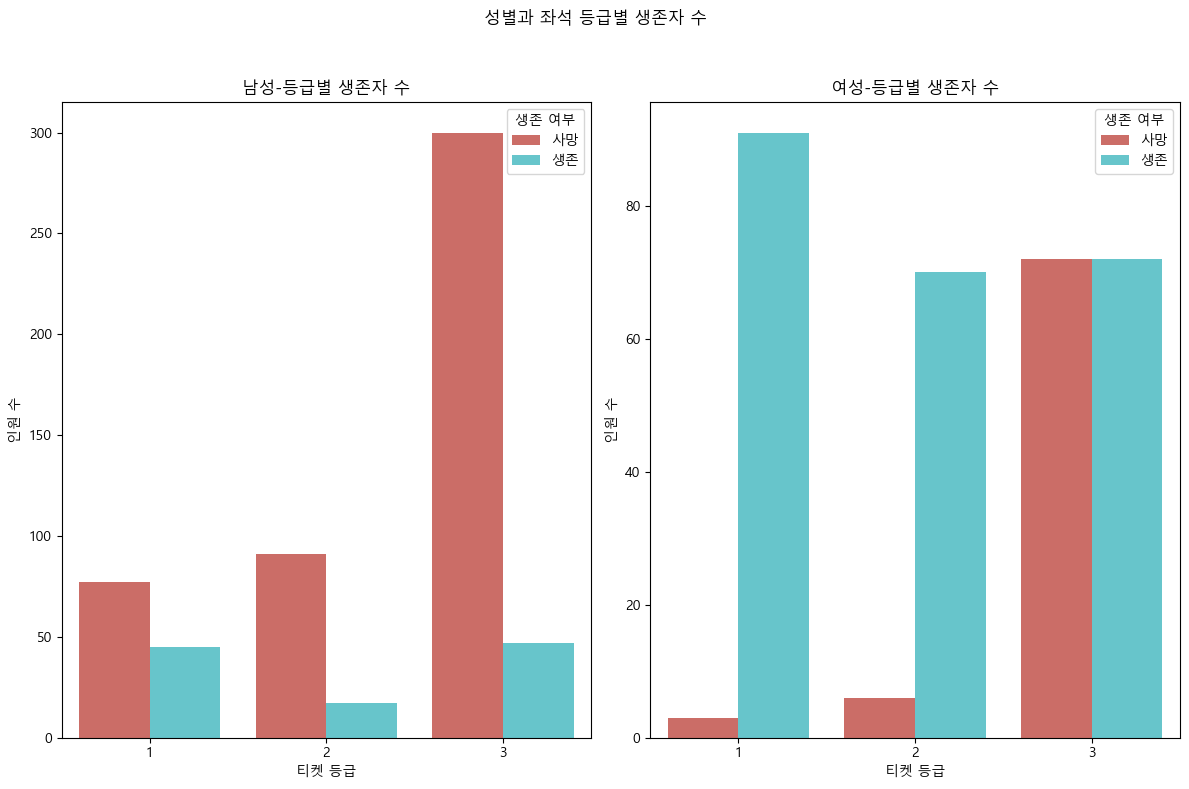

In [41]:
f,ax=plt.subplots(1,2,figsize=(12,8))

sns.countplot(data=df[df['Sex'] == 'male'], x='Pclass', hue='Survived',palette='hls',ax=ax[0])
ax[0].set_title('남성-등급별 생존자 수')
ax[0].set_xlabel('티켓 등급')
ax[0].set_ylabel('인원 수')

sns.countplot(data=df[df['Sex'] == 'female'], x='Pclass', hue='Survived',palette='hls',ax=ax[1])
ax[1].set_title('여성-등급별 생존자 수')
ax[1].set_xlabel('티켓 등급')
ax[1].set_ylabel('인원 수')

new_labels = ['사망', '생존']
for a in ax:
    handles, _ = a.get_legend_handles_labels()
    a.legend(handles, new_labels, title='생존 여부')
plt.suptitle('성별과 좌석 등급별 생존자 수')
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

앞서 살펴본 시각화에 따르면, 티켓 등급이 높을수록, 성별이 여성일 때 높은 생존률을 보였다. 

성별과, 티켓 등급 그리고 생존 여부를 통해, 각 티켓 등급에 몇명의 남녀가 탑승했고, 생존률은 어떻게 되는지 보다 자세히 살펴보려한다.

먼저, 티켓 등급 별 여성의 비율은 1등급이 제일 높고, 3등급이 제일 낮음을 알 수 있다.

그래프를 확인해보면, 1 등급과 2등급에 탑승한 여성은 90% 이상 생존하였고, 3등급에 탑승한 여성 역시 절반이 생존한 것을 알 수 있다.

그에 비해, 남성은 매우 낮은 생존률을 보이고 있는데, 1등급에 탑승한 남자의 생존률이 37%이고 나머지는 16%아래의 생존률을 보이고 있다.

정리하자면 1,2등급의 생존률이 더 높은 만큼, 상위 등급을 더 많은 인력과 장비를 사용하여 구조하였을 것이다. 그 중 여성을 먼저 구조하였기 때문에, 3등급칸의 여성 생존률이 나중에 구조된 1등급 칸의 남성 생존률보다 높다고 생각한다. 

또한 3등급 칸의 여성 비율이 더 높았다면, 3등급 칸의 생존률도 올라갔을 것으로 예상된다.

#### 2-2-2. Age,Pclass,Survived

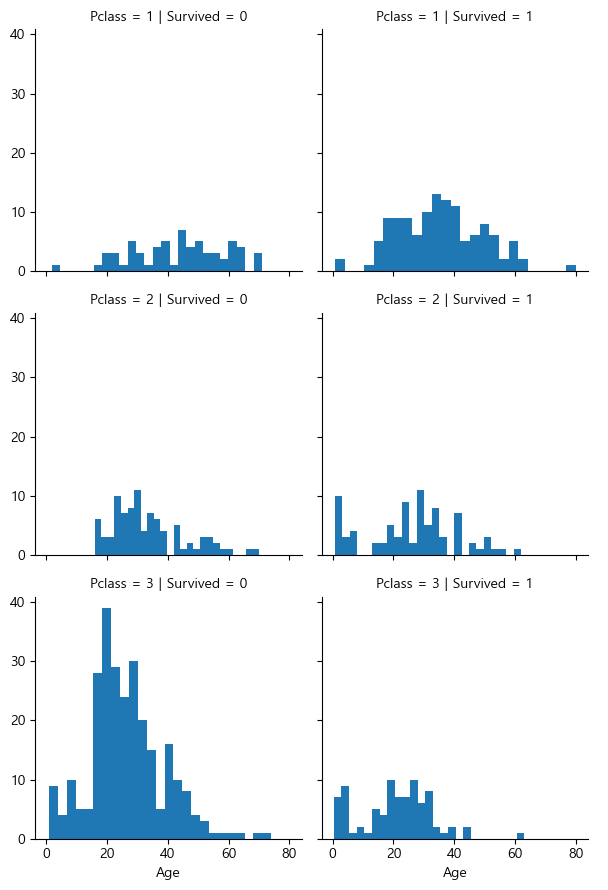

In [42]:
g = sns.FacetGrid(df, col = "Survived", row = "Pclass")
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

지금까지 살펴보면, 성별이 여성일 때 그리고 티켓 등급이 1등급일때, 승선항이 'Cherbourg'일때 생존률이 높게 나타나고 있다.

그래서 각 승선항 별 승객들의 성별, 티켓 등급에 대한 궁금증이 생겼다. 



#### 2-2-3. Embarked, Pclass, Sex, Survived

In [43]:
pd.crosstab([df.Embarked,df.Pclass],[df.Sex,df.Survived],margins=True).style.background_gradient(cmap='summer_r')

In [69]:
embarked_pclass_ratio = df.groupby('Embarked')['Pclass'].value_counts(normalize=True).unstack()

print('승선항 별 티켓 등급 비율:')
print(embarked_pclass_ratio)

승선항 별 티켓 등급 비율:
Pclass           1         2         3
Embarked                              
C         0.505952  0.101190  0.392857
Q         0.025974  0.038961  0.935065
S         0.197205  0.254658  0.548137


In [71]:
embarked_sex_ratio = df.groupby('Embarked')['Sex'].value_counts(normalize=True).unstack()

print("승선항 별 남녀 비율")
print(embarked_sex_ratio)

승선항 별 남녀 비율
Sex         female      male
Embarked                    
C         0.434524  0.565476
Q         0.467532  0.532468
S         0.315217  0.684783


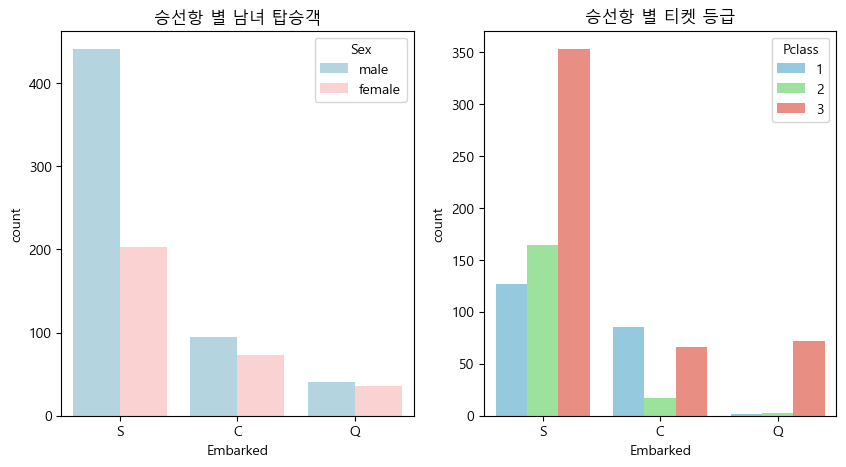

In [66]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(data=df,x='Embarked',hue='Sex', palette=["#ADD8E6","#FFCCCB"],ax=ax[0])
ax[0].set_title('승선항 별 남녀 탑승객')

sns.countplot(data=df,x='Embarked',hue='Pclass',palette=['skyblue','lightgreen','salmon'],ax=ax[1])
ax[1].set_title('승선항 별 티켓 등급')
plt.show()

다음의 표를 보면, 생존률이 제일 높던 'C'에서 승선한 탑승객의 50%가 1등급 좌석을 사용한 것과, 탑승객의 43%가 여성인 것을 알 수 있다. 

이를 통해 'C'에서 승선한 고객의 생존률이 높은 이유는, 높은 등급의 객실을 탑승한 것으로 유추할 수 있다.

'Q'에서 승선한 탑승객은 93.5%가 3등급 좌석을 사용하였다. 그러나 다른 승선항에 비해 여성의 비율이 높아, 'S' 승선항 승객들에 비해 조금 더 높은 생존률을 가지고 있다.

'S'에서 승선한 탑승객은 54.7%가 3등급 좌석을 사용하였다. 그러나 남성의 비율이 68.4%로 다른 승선항에 비해 10%정도 높아, 다른 승선항에서 탑승한 승객들보다 낮은 생존률을 보이게 되었다.


#### 2-2-4. SibSp,Pclass

In [45]:
pd.crosstab(df.SibSp,df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


(형제,자매,배우자)의 수에 따라 생존률이 다른 것을 위에서 확인할 수 있었다.
이를 자세히 확인해보고자, 탑승 클래스별 동반자의 수를 확인해보았다.

이를 통해 생존률이 높게 나타나던, 1명의 동반자와 탑승한 승객들이 1,2 등급 티켓을 구매한 것을 확인할 수 있었다. 
그 다음으로 생존률이 높았던, 2명의 동반자와 탑승한 승객들 역시 1,2 등급 티켓을 구매한 승객의 비율이 높은 것을 확인할 수 있다.

위의 표를 통해 1,2명의 동반자와 함께 탑승한 승객들이 다른 승객들에 비해, 더 높은 티켓을 구매하여, 더 퀄리티가 높은 숙소를 원했음을 알 수 있다.


## 3.머신러닝

### 3-1.결측치 처리 

#### 3-1-1. Embarked 결측치 처리 

In [46]:
df[df["Embarked"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,LastName,Initial
PassengerId,,,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,35-39,Icard,Miss
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,60-64,Stone,Mrs


In [47]:
df["Embarked"] = df["Embarked"].fillna("C")
df[df["Embarked"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,LastName,Initial
PassengerId,,,,,,,,,,,,,,


Embarked, 승선항에 대한 결측치가 존재하는 행은 2개이다. 
72.4%의 승객이 사우스햄튼에서 승선하였고, 1등급 승객칸 역시, 사우스햄튼에서 승선한 승객이 제일 많으므로, 결측치를 사우스햄튼 승선으로 바꿔주겠다.

#### 3-1-2. Age 결측치 처리

In [48]:
df[df["Age"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,LastName,Initial
PassengerId,,,,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,Moran,Mr
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,NaN,Williams,Mr
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,NaN,Masselmani,Mrs
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,NaN,Emir,Mr
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,NaN,O'Dwyer,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,NaN,Razi,Mr
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,Sage,Miss
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,NaN,van Melkebeke,Mr


In [49]:
df['Initial'] = df.Name.str.extract('([A-Za-z]+)\\.')

In [50]:
df['Initial']

PassengerId
1        Mr
2       Mrs
3      Miss
4       Mrs
5        Mr
       ... 
887     Rev
888    Miss
889    Miss
890      Mr
891      Mr
Name: Initial, Length: 891, dtype: object

In [51]:
pd.crosstab(df.Initial,df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [52]:
df['Initial'].replace({'Mlle': 'Miss','Ms': 'Miss'}, inplace=True)
df['Initial'].replace({'Mme': 'Mrs','Lady': 'Mrs','Countess': 'Mrs'}, inplace=True)
df['Initial'].replace({'Sir': 'Mr', 'Don': 'Mr', 'Capt': 'Mr', 'Major':'Mr','Col':'Mr','Rev':'Mr','Jonkheer': 'Mr'}, inplace=True)


In [53]:
pd.crosstab(df.Initial,df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Dr,Master,Miss,Mr,Mrs
Sex,,,,,
female,1,0,185,0,128
male,6,40,0,531,0


In [54]:
df.groupby('Initial')['Age'].mean()

Initial
Dr        42.000000
Master     4.574167
Miss      21.845638
Mr        32.891990
Mrs       35.873874
Name: Age, dtype: float64

In [55]:
df.loc[(df.Age.isnull())&(df.Initial=='Mr'),'Age']=33
df.loc[(df.Age.isnull())&(df.Initial=='Mrs'),'Age']=36
df.loc[(df.Age.isnull())&(df.Initial=='Master'),'Age']=5
df.loc[(df.Age.isnull())&(df.Initial=='Miss'),'Age']=22
df.loc[(df.Age.isnull())&(df.Initial=='Dr'),'Age']=42

In [56]:
df[df["Age"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,LastName,Initial
PassengerId,,,,,,,,,,,,,,


총 177명의 승객에 대한 나이 정보가 존재하지 않는 것을 알 수 있다.  승객들 이름의 호칭을 이용하여 나이를 채워주려한다.

mr, master, mrs, miss 등이 대부분이나, 다른 호칭을 가진 사람들이 존재한다. 이들의 의미를 검색하여, mrs,miss, mr에 재분배해 주었다.

dr, 의사 칭호는 1명의 여성과 6명의 남성이 가지고 있기에, 바꾸어 주지 않았다. 

그 후, mr, miss, mrs, master, dr 칭호를 가진 사람의 평균 나이를 계산하여 결측치를 채워주었다.

#### 3-1-3. Cabin 결측치 처리

In [57]:
df.drop('Cabin', axis=1, inplace=True)

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,LastName,Initial
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,20-24,Braund,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,35-39,Cumings,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,25-29,Heikkinen,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35-39,Futrelle,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35-39,Allen,Mr


Embarkd는 2개, age는 177개로 20% 정도가 결측치였다. 그러나 Cabin은 절반 이상이 결측치이고, 한 승객이 C23 C25 C27 등 여러 개의 값을 가지므로, 제거하도록 하겠다.

### 3-2. 상관관계 분석 

In [72]:
df['Sex'].replace(['male','female'],[0,1],inplace=True)
df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df['Initial'].replace(['Mr','Mrs','Miss','Master','Dr'],[0,1,2,3,4],inplace=True)


C:\Users\jeongbin\AppData\Local\Temp\ipykernel_40876\411101731.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace(['male','female'],[0,1],inplace=True)
C:\Users\jeongbin\AppData\Local\Temp\ipykernel_40876\411101731.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'].repl

KeyError: 'Initial'

In [59]:
df_c=df.copy()
df_c.drop(['Name','Ticket','Age_group'],axis=1,inplace=True)

plt.rcParams['font.family'] = 'DejaVu Sans'
sns.heatmap(df_c.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20},fmt='.2f')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

ValueError: could not convert string to float: 'Braund'

문자형 변수인 name과, ticket, 그리고 Age_group을 제거하고 상관계수를 출력해보았다.
Sex, Embarked, Initial의 상관계수를 파악하기 위해 수치형 데이터로 변환시켰다.

그 결과 각 변수들 사이에 0.7이상인 높은 상관관계를 가진 변수들이 없다는 것을 확인하였다. 


### 3-2. 모델 훈련

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

X = df.drop(['Survived', 'Name', 'Ticket','Age_group'], axis=1)  
Y = df['Survived']
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)

#### 3-2-1. 로지스틱 회귀 

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('로지스틱 회귀 정확도:',metrics.accuracy_score(prediction1,test_Y))
print('로지스틱 회귀 혼동행렬:',confusion_matrix(prediction1,test_Y))

로지스틱 회귀를 실행했더니 정확도가 0.82%가 나왔다. 다른 모델을 학습시켜 정확도를 측정해보려한다.

#### 3-2-2. 의사결정 나무 

In [ ]:
model=DecisionTreeClassifier(random_state=0)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('의사결정나무 정확도',metrics.accuracy_score(prediction2,test_Y))

의사결정나무는 0.8에 가까운 정확도를 보이고 있다.

#### 3-2-3. Knn 분류기 

In [ ]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('Knn 모델 정확도',metrics.accuracy_score(prediction3,test_Y))

#### 3-2-4. 나이브 베이즈 분류기

In [ ]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('나이브 분류기:',metrics.accuracy_score(prediction4,test_Y))

#### 3-2-5. 랜덤 포레스트 분류기 

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('랜덤 포레스트 분류기:',metrics.accuracy_score(prediction5,test_Y))

In [ ]:
df.isnull().sum()

## 3-3. 앙상블 분석



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('AdaBoost 정확도',result.mean())